# Employee Future Prediction
## 조용한사자처럼

---
* A company's HR department wants to predict whether some customers would leave the company in next 2 years. 
* Your job is to build a predictive model that predicts the prospects of future and present employee.
* Perform EDA and bring out insights
___
[Source]https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction

---
Indep
* Education : EDUCATION LEVEL
* JoiningYear : YEAR OF JOINING COMPANY
* City : CITY OFFICE WHERE POSTED
* PaymentTier : PAYMENT TIER - 1: HIGHEST | 2: MID LEVEL | 3:LOWEST
* Age : CURRENT AGE
* Gender : GENDER OF EMPLOYEE
* EverBenched : EVER KEPT OUT OF PROJECTS FOR 1 MONTH OR MORE
* ExperienceInCurrentDomain : EXPERIENCE IN CURRENT FIELD
---
Target
* LeaveOrNot : WHETHER EMPLOYEE LEAVES THE COMPANY IN NEXT 2 YEARS
---

## 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%matplotlib inline

In [2]:
df = pd.read_csv("data/Employee.csv")
df.shape

(4653, 9)

In [3]:
label_name = "LeaveOrNot"
X = df[df.columns[df.columns!=label_name]]
y = df[label_name]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3722, 8)
(3722,)
(931, 8)
(931,)


In [6]:
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

0    0.656099
1    0.343901
Name: LeaveOrNot, dtype: float64
0    0.656284
1    0.343716
Name: LeaveOrNot, dtype: float64


## EDA

In [7]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [8]:
df.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [10]:
display(df.describe())
display(df.describe(include = "object"))

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


,Education,City,Gender,EverBenched
count,4653,4653,4653,4653
unique,3,3,2,2
top,Bachelors,Bangalore,Male,No
freq,3601,2228,2778,4175


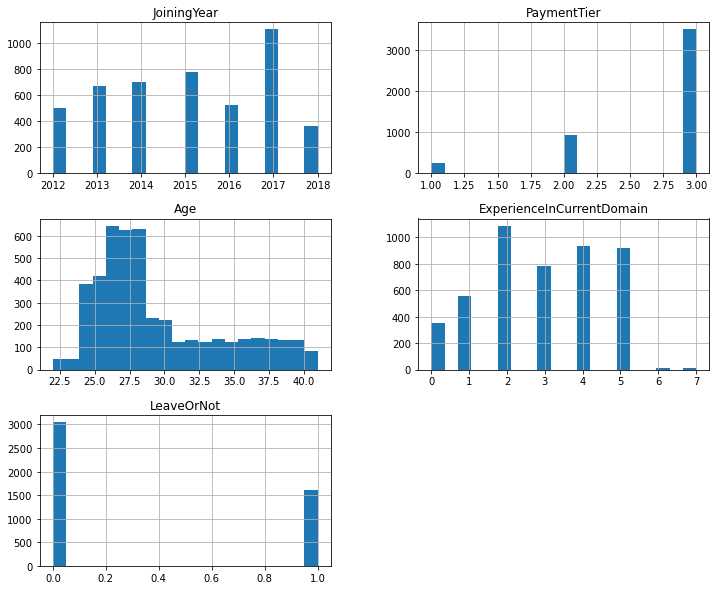

In [11]:
_= df.hist(bins = 20, figsize = (12, 10))

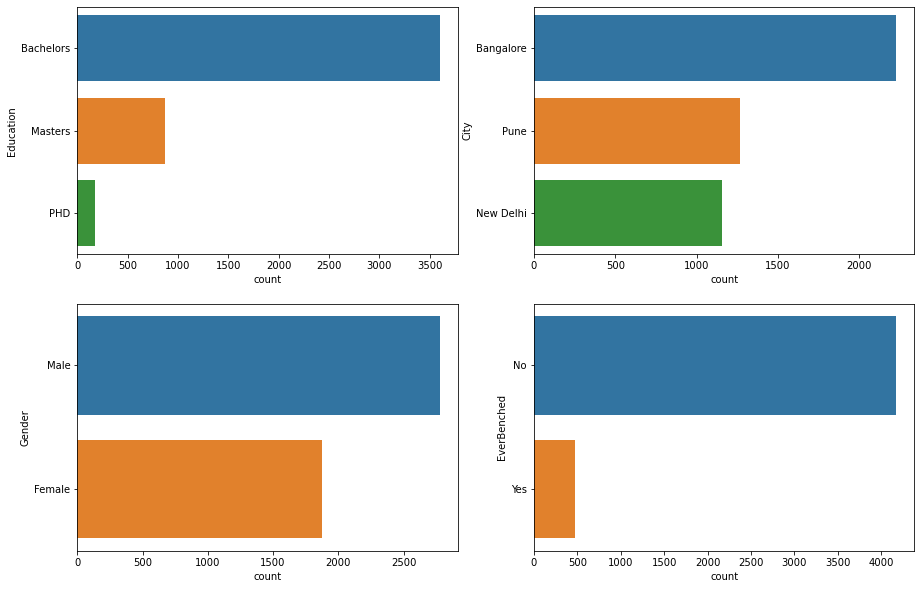

In [12]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
_= sns.countplot(data = df, y ="Education", ax = axes[0, 0])
_= sns.countplot(data = df, y ="City", ax = axes[0, 1])
_= sns.countplot(data = df, y ="Gender", ax = axes[1, 0])
_= sns.countplot(data = df, y ="EverBenched", ax = axes[1, 1])

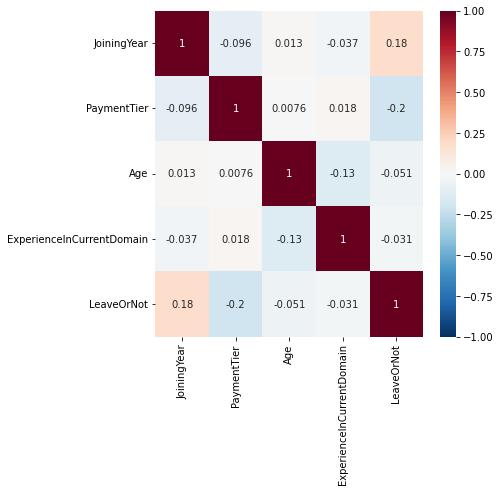

In [13]:
df_corr = df.corr()
plt.figure(figsize= (6, 6))
_= sns.heatmap(data = df_corr, annot= True, cmap = "RdBu_r", vmin = -1, vmax = 1)

## 전처리 및 특성 공학

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 290.9+ KB


In [15]:
# X_ohe = pd.get_dummies(X)
# X_train_ohe = X_ohe.loc[X_train.index]
# X_test_ohe = X_ohe.loc[X_test.index]

In [16]:
from sklearn.preprocessing import OneHotEncoder
cat_col = ["Education", "City", "PaymentTier", "Gender", "EverBenched"]
num_col = X.columns[~X.columns.isin(cat_col)].tolist()
ohe = OneHotEncoder()

In [17]:
ohe.fit(X[cat_col])

OneHotEncoder()

In [18]:
X_ohe = pd.DataFrame(ohe.transform(X[cat_col]).toarray(), columns = ohe.get_feature_names_out())
X_ohe[num_col] = X[num_col].copy()

In [19]:
X_train_ohe = X_ohe.loc[X_train.index]
X_test_ohe = X_ohe.loc[X_test.index]

## 모델링

### Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegressionCV
lr_model = LogisticRegressionCV(random_state = 42, cv = 10, n_jobs = -1)

In [21]:
lr_model.fit(X_train_ohe, y_train)

LogisticRegressionCV(cv=10, n_jobs=-1, random_state=42)

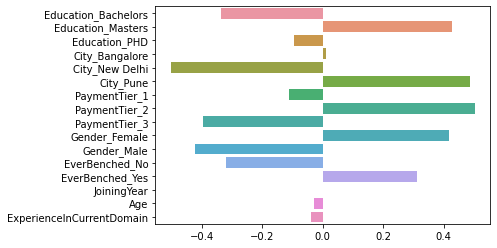

In [22]:
_= sns.barplot(x = lr_model.coef_[0], y = lr_model.feature_names_in_)

In [23]:
lr_model.score(X_train_ohe, y_train)

0.7229983879634605

In [24]:
y_predict_lr = lr_model.predict(X_test_ohe)

In [25]:
(y_predict_lr == y_test).mean()

0.7368421052631579

Text(33.0, 0.5, 'y_predict')

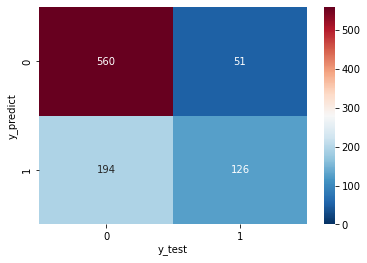

In [26]:
from sklearn.metrics import confusion_matrix
_= sns.heatmap(confusion_matrix(y_test, y_predict_lr), fmt = "d", annot = True, vmin = 0, cmap = "RdBu_r")
_.set_xlabel("y_test")
_.set_ylabel("y_predict")

### Decision tree classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(random_state = 42)

In [28]:
DT_model.fit(X_train_ohe, y_train)

DecisionTreeClassifier(random_state=42)

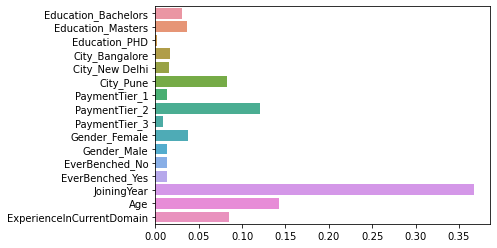

In [29]:
_= sns.barplot(x = DT_model.feature_importances_, y = DT_model.feature_names_in_)

In [30]:
DT_model.score(X_train_ohe, y_train)

0.9296077377753896

In [31]:
y_predict_DT = DT_model.predict(X_test_ohe)

In [32]:
(y_predict_DT == y_test).mean()

0.8002148227712137

Text(33.0, 0.5, 'y_predict')

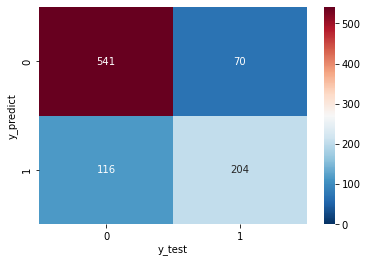

In [33]:
_= sns.heatmap(confusion_matrix(y_test, y_predict_DT), fmt = "d", annot = True, vmin = 0, cmap = "RdBu_r")
_.set_xlabel("y_test")
_.set_ylabel("y_predict")

### Random forest classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(random_state = 42)

In [35]:
RF_model.fit(X_train_ohe, y_train)

RandomForestClassifier(random_state=42)

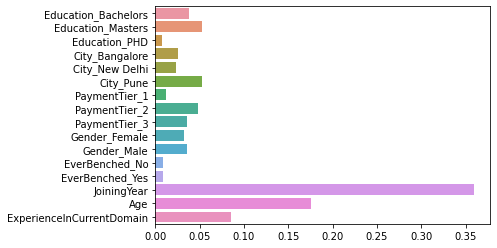

In [36]:
_= sns.barplot(x = RF_model.feature_importances_, y = RF_model.feature_names_in_)

In [37]:
RF_model.score(X_train_ohe, y_train)

0.9296077377753896

In [38]:
y_predict_RF = RF_model.predict(X_test_ohe)

In [39]:
accuracy = (y_predict_RF == y_test).mean()
accuracy

0.832438238453276

Text(33.0, 0.5, 'y_predict')

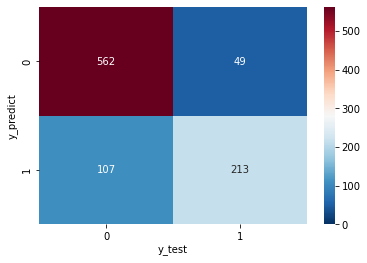

In [40]:
_= sns.heatmap(confusion_matrix(y_test, y_predict_RF), fmt = "d", annot = True, vmin = 0, cmap = "RdBu_r")
_.set_xlabel("y_test")
_.set_ylabel("y_predict")

## Streamlit으로 구현한 대시보드(EDA /  모델링 직접 해보기 / 나의 퇴사확률은?)
---
https://jihongleejihong-ql-employee-future-prediction-main-xabexm.streamlitapp.com/

## 마치며

이번 프로젝트에서는 따로 전처리를 하지 않은채, one hot encoding만을 거친 데이터로 test data를 예측해봤는데, 예측력이 꽤 잘나와서 신기했다. streamlit을 처음으로 구현해보았는데, 생각보다 쉬운 함수들로 구현할 수 있는 것이 신기했다.